<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/LEGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd

##Load the data

In [96]:
df = pd.read_csv('/content/drive/MyDrive/Projekty/LEGO/lego_sets.csv')
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [97]:
theme = pd.read_csv('/content/drive/MyDrive/Projekty/LEGO/parent_themes.csv')
theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [98]:
theme.describe()

,id
count,111.000000
mean,405.270270
std,145.444394
min,1.000000
25%,298.500000
50%,411.000000
75%,505.500000
max,610.000000


##Explore the data

###How many sets are licensed?

In [99]:
# Quantity of licensed themes (not the sets)
is_licensed = theme.loc[theme['is_licensed'] == True].count()['id']
is_licensed

22

####Merging the datasets - parent_theme with name

In [100]:
df_merged = df.merge(theme, left_on = 'parent_theme', right_on = 'name')
df_merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,Legoland,False


In [101]:
df_merged.drop(columns = 'name_y', inplace = True)
df_merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


####Droping NaNs

In [102]:
df_merged[df_merged['set_num'].isnull()].shape

(153, 8)

In [103]:
df_merged = df_merged.dropna(subset = ['set_num'])

####Filtering for licensed sets

In [104]:
df_licensed = df_merged[df_merged['is_licensed']]
df_licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


####Filtering for the Star Wars sets

In [105]:
from pandas.core.arrays.categorical import contains
import re
star_wars = df_licensed[df_licensed['parent_theme'].str.contains('star wars', flags = re.I, regex = True)]
star_wars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [106]:
the_force = int(star_wars.shape[0]/df_licensed.shape[0]*100)
print(the_force)

51


###Popularity of the Star Wars sets over the years

In [107]:
df_licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [108]:
df_summed = df_licensed.groupby(['year', 'parent_theme']).sum().reset_index()
df_summed.head()

,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
1,2000,Disney's Mickey Mouse,405.0,1940,5
2,2000,Star Wars,2580.0,4108,26
3,2001,Harry Potter,1284.0,2706,11
4,2001,Star Wars,2949.0,2212,14


####Drop duplicates to get the first rows (with the highest quantity)

In [109]:
df_sorted = df_summed.sort_values('is_licensed', ascending = False)
df_sorted.head()

,year,parent_theme,num_parts,id,is_licensed
82,2017,Super Heroes,13123.0,34704,72
76,2016,Star Wars,6934.0,9638,61
67,2015,Star Wars,11410.0,9164,58
81,2017,Star Wars,7583.0,8690,55
59,2014,Star Wars,8293.0,7110,45


In [110]:
df_max = df_sorted.drop_duplicates(['year'])
df_max = df_max.sort_values(['year'], ascending = False)
df_max

,year,parent_theme,num_parts,id,is_licensed
82,2017,Super Heroes,13123.0,34704,72
76,2016,Star Wars,6934.0,9638,61
67,2015,Star Wars,11410.0,9164,58
59,2014,Star Wars,8293.0,7110,45
52,2013,Star Wars,6159.0,5530,35
47,2012,Star Wars,6769.0,6794,43
42,2011,Star Wars,3451.0,5056,32
36,2010,Star Wars,6003.0,4740,30
32,2009,Star Wars,3953.0,6162,39
28,2008,Star Wars,6865.0,3634,23


In [111]:
# new_era = df_max['year']
new_era = df_max.loc[df_max['parent_theme'] != 'Star Wars']['year']
new_era = new_era.values[0]
print(new_era)

2017


###How many unique sets were released each year?

In [112]:
df_merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


####Add additional column ('count') to count the appereances of the years

In [113]:
df_years = df_merged.copy()
df_years['count'] = 1
df_years = df_years.groupby(['year']).sum().reset_index()[['year', 'count']]
df_years.head()

,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12


####Answer

In [114]:
for index, row in df_years.iterrows():
  print(row['year'], row['count'])

1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 68
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438


####Different way to get the size of the group (size())

In [115]:
df_years = df_merged.groupby(['year']).size().reset_index()
df_years.head()

,year,0
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12


###Which year was the most sets released?

In [119]:
# df_years.columns.values
df_years = df_years.rename(columns={"year": "Year", df_years.columns.values[1]: "Number of sets"})
df_years = df_years.sort_values(['Number of sets'], ascending = False)
df_years.head()

,Year,Number of sets
62,2014,715
63,2015,670
60,2012,615
64,2016,608
61,2013,593


In [117]:
# answer = df_years.loc[df_years['Number of sets'].max()]['year']
answer = df_years.loc[df_years['Number of sets'] == df_years['Number of sets'].max(), 'year'].iloc[0]
answer

2014

###Charts

In [118]:
import matplotlib.pyplot as plt

In [120]:
df_years.head()

,Year,Number of sets
62,2014,715
63,2015,670
60,2012,615
64,2016,608
61,2013,593


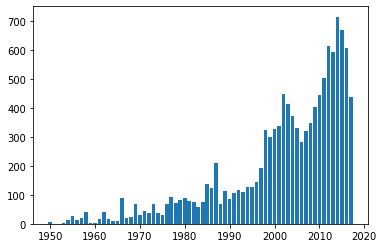

<Figure size 216x144 with 0 Axes>

In [122]:
labels = df_years['Year']
values = df_years['Number of sets']

bars = plt.bar(labels, values)

plt.figure(figsize = (3,2))

plt.show()